In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [125]:
run = "72"

## Sequence of requests

- Optimal seq taken from the `/simulations/reserv_seq/*/*algo2.txt`
- Memory division seq taken from `figure 7` in the paper

In [119]:
request = [114, 126, 140]
memory_req = [25]

## Read the memory footprint information for VU and Inria

- In files `run*.mem` for VU and `run*_inria.mem`
- For VU taking one snapshot every 2 seconds (it takes 1.3s in average to take the snapshot) so total time for VU = len(snapshots) * 3.3
- For Inria snapshot taken every 2 seconds, so total time for VU = len(snapshots) * 2

In [126]:
inf = open("SLANT_logs/run%s.mem" %(run), "r")
mem_footprint = []
for line in inf:
    line = line.split('\n')[0]
    if line == "":
        continue
    mem = float(line.strip('MGB'))
    # transform memory into GB
    if 'M' in line:
        mem /= 1024
    mem_footprint.append(mem)

print(len(mem_footprint), "timestept. Total execution:", (len(mem_footprint)-1)*3.3/60, "min")

3666 timestept. Total execution: 201.575 min


In [127]:
inf = open("SLANT_logs/run%s_inria.mem" %(run), "r")
#inf = open("SLANT_logs/slant.mem.log", "r")
inria_footprint = []
for line in inf:
    line = line.split('\n')[0].split(",")
    if len(line) != 2:
        continue
    mem = (int(line[0]), int(line[1])/(1024*1024))
    inria_footprint.append(mem)

print(len(inria_footprint), "timestept. Total execution:", inria_footprint[-1][0]/60, "min")

4276 timestept. Total execution: 142.5 min


In [64]:
max([i[1] for i in inria_footprint[1300:3300]])

47.79341125488281

In [65]:
max(mem_footprint[720:3181])

51.16

## Plot the memory usage throughout the execution of the application

- Vertical lines for reservation ends
- For VU reservations we use the ones given for Inria scaled by a factor

In [53]:
# general scale for the entire walltime
scale_factor = 1.6
# factor for scaling each phase
memory_factor = [1.1, 1.6, 1.2]

182.4 215.875
201.60000000000002 215.875
224.0 215.875
27.500000000000004 215.875


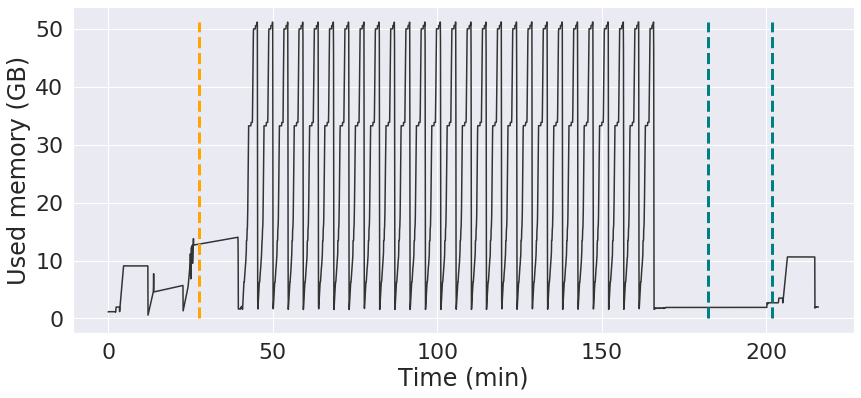

In [59]:
# Plot VU performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

# plot the memory usage
plt.plot([3.3*i/60 for i in range(len(mem_footprint))], mem_footprint, color="#333333")

# plot the vertical lines with requests
for i in request:
    print(i * scale_factor, len(mem_footprint) * 3.3 / 60)
    if i * scale_factor > len(mem_footprint) * 3.3 / 60:
        break
    plt.plot([i * scale_factor, i * scale_factor],
             [0, max(mem_footprint)], '--', linewidth=3,
             color="teal")

# plot the vertical lines to divide memory
idx = 0
for i in memory_req:
    print(i * memory_factor[idx], len(mem_footprint) * 3.3 / 60)
    if i * memory_factor[idx] > len(mem_footprint) * 3.3 / 60:
        break
    plt.plot([i * memory_factor[idx], i * memory_factor[idx]],
             [0, max(mem_footprint)], '--', linewidth=3,
             color="orange")
    if idx < len(memory_factor)-1:
        idx += 1

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
#plt.savefig("SLANT_logs/memusage_%s.png" %(run))
plt.show()

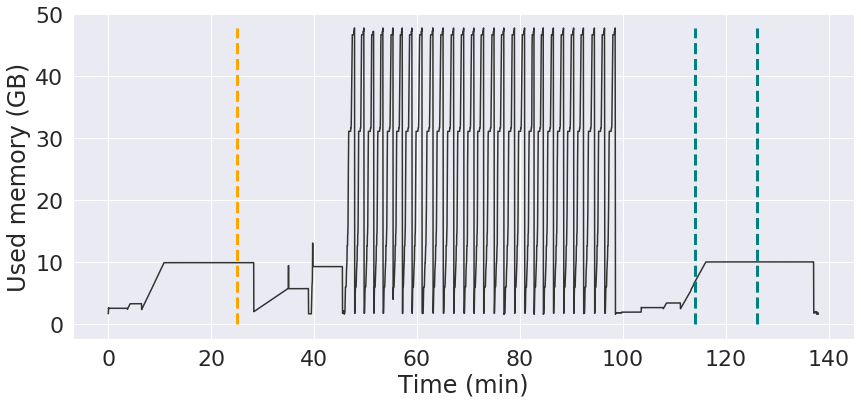

In [43]:
# Plot Inria performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

# plot the memory usage
plt.plot([i[0]/60 for i in inria_footprint], [i[1] for i in inria_footprint], color="#333333")


# plot the vertical lines with requests
for i in request:
    if i > inria_footprint[-1][0] / 60:
        break
    plt.plot([i, i], [0, max([i[1] for i in inria_footprint])],
             '--', linewidth=3, color="teal")

# plot the vertical lines to divide memory
for i in memory_req:
    if i > inria_footprint[-1][0] / 60:
        break
    plt.plot([i, i], [0, max([i[1] for i in inria_footprint])],
             '--', linewidth=3, color="orange")

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
#plt.savefig("SLANT_logs/memusage_%s_inria.png" %(run))
plt.show()

## Plot the memory footprint when using different sequences

- numbers extracted from the previous cells when changing the sequences based on Valentin's files

In [219]:
seq_algo = [0,0]
st = {0: (0, 0), 1: (500, 750)}
seq_algo[0] = {5: 126, 10:117, 20: 123, 50:116, 100: 117}
seq_algo[1] = {5: 123, 10:112, 20: 115, 50: 111, 100: 110}
res={}
for algo in range(2):
    res[(algo+1, "VU")] = []
    res[(algo+1, "inria")] = []
    for train in [5, 10, 20, 50, 100]:
        req = seq_algo[algo][train]
        end = len(mem_footprint)
        iend = len(inria_footprint)
        fs = req * 60 *1.55 / 3.3
        ifs = req * 30
        VU = (st[algo][0] * 15 + (end - fs) * 15 + (fs - st[algo][0]) * 50) / end
        inria = (st[algo][1] * 15 + (iend - ifs) * 15 + (ifs - st[algo][1]) * 50) / iend
        print(train,"algo%d" %(algo+1), VU, inria)
        res[(algo+1, "VU")].append(VU)
        res[(algo+1, "inria")].append(inria)
print(res)

5 algo1 48.90120517780093 45.940130963517305
10 algo1 46.479690522243715 43.730121608980355
20 algo1 48.09403362594852 45.20346117867165
50 algo1 46.210633338292915 43.48456501403181
100 algo1 46.479690522243715 43.730121608980355
5 algo2 43.320438426821404 39.06454630495791
10 algo2 40.360809403362595 36.36342376052385
20 algo2 41.16798095521501 37.1000935453695
50 algo2 40.091752219411795 36.117867165575305
100 algo2 39.822695035460995 35.87231057062675
{(1, 'VU'): [48.90120517780093, 46.479690522243715, 48.09403362594852, 46.210633338292915, 46.479690522243715], (1, 'inria'): [45.940130963517305, 43.730121608980355, 45.20346117867165, 43.48456501403181, 43.730121608980355], (2, 'VU'): [43.320438426821404, 40.360809403362595, 41.16798095521501, 40.091752219411795, 39.822695035460995], (2, 'inria'): [39.06454630495791, 36.36342376052385, 37.1000935453695, 36.117867165575305, 35.87231057062675]}


In [268]:
df = pd.DataFrame()
df["Training"] = [5, 10, 20, 50, 100] * 4
df["Application"] = [23 for _ in range(20)]
df["Memory"] = [51 for _ in range(5)] +\
                [51 for _ in range(5)] +\
               [39.849070272880944, 37.05988891572084, 37.82057474040087, 36.80632697416083, 36.552765032600824] +\
               [41.451650260567455, 38.687319050376374, 39.441227562246674, 38.436016213086276, 38.18471337579618]
#               [46.664157498552406, 44.40243196294152, 45.910248986682106, 44.15112912565142, 44.40243196294152] +\
#               [46.94880463656122, 44.66674716252113, 46.18811881188119, 44.41318522096112, 44.66674716252113] +\

df["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(5)] + ["KNL ALL-CKPT" for _ in range(5)] +\
                    ["Haswell MEM-ALL-CKPTv2" for _ in range(5)] + ["KNL MEM-ALL-CKPTv2" for _ in range(5)]


In [269]:
temp = pd.DataFrame()
temp["Training"] = [5, 10, 20, 50, 100] * 4
temp["Application"] = [26 for _ in range(20)]
temp["Memory"] =[51 for _ in range(5)] +\
                [51 for _ in range(5)] +\
               [40.17123287671233, 37.3458904109589, 38.11643835616438, 37.08904109589041, 36.832191780821915] +\
                [40.87159912103844, 38.16788618807059, 38.905262442516374, 37.92209410325533, 37.67630201844007]
#                [45.9698026867227, 43.75767392338537, 45.23242643227692, 43.511881838570105, 43.75767392338537] +\
#                [47.363013698630134, 45.0513698630137, 46.592465753424655, 44.794520547945204, 45.0513698630137] +\

temp["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(5)] + ["KNL ALL-CKPT" for _ in range(5)] +\
                      ["Haswell MEM-ALL-CKPTv2" for _ in range(5)] + ["KNL MEM-ALL-CKPTv2" for _ in range(5)]
df = pd.concat([df, temp])

In [270]:
temp = pd.DataFrame()
temp["Training"] = [5, 10, 20, 50, 100] * 4
temp["Application"] = [2 for _ in range(20)]
temp["Memory"] = [51 for _ in range(5)] +\
                [51 for _ in range(5)] +\
                [42.75829511734556, 39.6425681143782, 40.49231184246021, 39.35932020501753, 39.076072295656864]+\
                 [41.05338200068438, 38.330671837572716, 39.073229154785, 38.08315273183529, 37.83563362609787] 
 #              [46.18740732291548, 43.95973537127866, 45.4448500057032, 43.71221626554124, 43.95973537127866] +\
 #                [50.6892365794443, 48.14000539519827, 49.83949285136229, 47.856757485837605, 48.14000539519827]+\
 
temp["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(5)] + ["KNL ALL-CKPT" for _ in range(5)] +\
                      ["Haswell MEM-ALL-CKPTv2" for _ in range(5)] + ["KNL MEM-ALL-CKPTv2" for _ in range(5)]
df = pd.concat([df, temp])

In [271]:
temp = pd.DataFrame()
temp["Training"] = [5, 10, 20, 50, 100] * 4
temp["Application"] = [69 for _ in range(20)]
temp["Memory"] = [51 for _ in range(5)] +\
                [51 for _ in range(5)] +\
               [39.849070272880944, 37.05988891572084, 37.82057474040087, 36.80632697416083, 36.552765032600824] +\
                [41.165001832844574, 38.430626832844574, 39.176365469208214, 38.182047287390034, 37.93346774193548]
#                [46.321022727272734, 44.08380681818182, 45.575284090909086, 43.83522727272727, 44.08380681818182] +\
#               [46.74946004319654, 44.481641468682504, 45.99352051835853, 44.22966162706984, 44.481641468682504] +\
               
temp["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(5)] + ["KNL ALL-CKPT" for _ in range(5)] +\
                      ["Haswell MEM-ALL-CKPTv2" for _ in range(5)] + ["KNL MEM-ALL-CKPTv2" for _ in range(5)]
df = pd.concat([df, temp])

In [272]:
temp = pd.DataFrame()
temp["Training"] = [5, 10, 20, 50, 100] * 4
temp["Application"] = [72 for _ in range(20)]
temp["Memory"] = [51 for _ in range(5)] +\
                [51 for _ in range(5)] +\
               [39.06454630495791, 36.36342376052385, 37.1000935453695, 36.117867165575305, 35.87231057062675] +\
                [43.320438426821404, 40.360809403362595, 41.16798095521501, 40.091752219411795, 39.822695035460995]
#                [48.90120517780093, 46.479690522243715, 48.09403362594852, 46.210633338292915, 46.479690522243715] +\
#               [45.940130963517305, 43.730121608980355, 45.20346117867165, 43.48456501403181, 43.730121608980355] +\
temp["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(5)] + ["KNL ALL-CKPT" for _ in range(5)] +\
                      ["Haswell MEM-ALL-CKPTv2" for _ in range(5)] + ["KNL MEM-ALL-CKPTv2" for _ in range(5)]
df = pd.concat([df, temp])

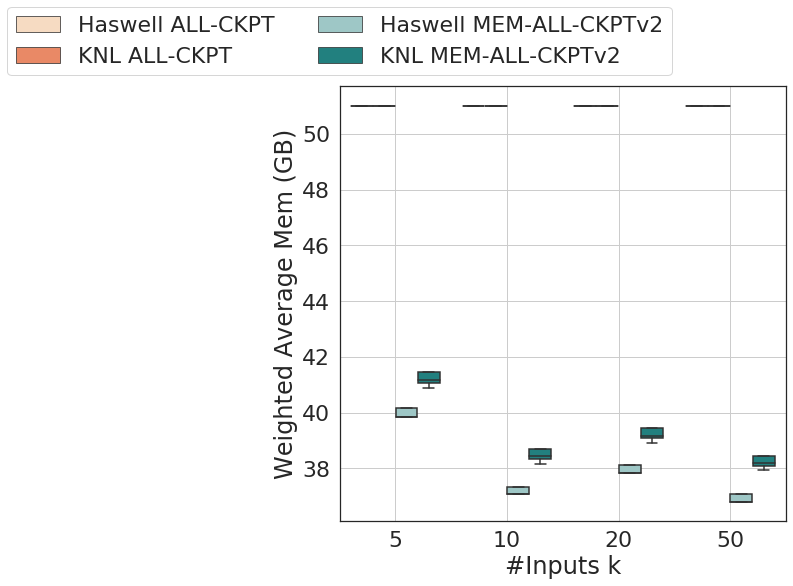

In [273]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=2)
sns.set_style("white")

my_pallette = {"Haswell ALL-CKPT": 'peachpuff', "Haswell MEM-ALL-CKPTv2": '#97cecc',
               "KNL ALL-CKPT": 'coral', "KNL MEM-ALL-CKPTv2": '#12908e'} 

bar = sns.boxplot(y="Memory", x="Training", hue="Server/Algo",
                  data=df[df.Training!=100],
                  showfliers=False, palette=my_pallette)
    
#ax.set_ylim(32, 52)
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0, 1))
plt.grid(True)
ax.set_ylabel('Weighted Average Mem (GB)')
ax.set_xlabel('#Inputs k')
plt.savefig("figures/vu_inria_mem.png", bbox_inches = 'tight')
plt.show()

In [255]:
df["Application"].unique()

array([23, 26,  2, 69, 72])

In [265]:
def compute_reserve_time(vect, aid):
	df = pd.DataFrame()
	df["Training"] = [5, 10, 20, 50] * 4
	df["Application"] = [aid for _ in range(16)]
	df["Memory"] = vect
	df["Server/Algo"] = ["Haswell ALL-CKPT" for _ in range(4)] + ["KNL ALL-CKPT" for _ in range(4)] +\
		            ["Haswell MEM-ALL-CKPTv2" for _ in range(4)] + ["KNL MEM-ALL-CKPTv2" for _ in range(4)]
	return df

df = compute_reserve_time([129.6, 129.3, 128.3, 129.4] +\
       			    [205.2, 206.5, 205.1, 204.3] +\
       			    [128.1, 127.9, 126.3, 127.4] +\
       			    [204.5, 203.3, 203.5, 203.1], 23)
temp = compute_reserve_time([130.1, 129.3, 129.6, 129.3] +\
       			    [208.1, 207.2, 206.7, 206.7] +\
       			    [126.1, 127.4, 126.3, 128.2] +\
       			    [204.5, 203.4, 203.6, 203.1], 26)
df = pd.concat([df, temp])
temp = compute_reserve_time([128.2, 127.3, 127.3, 128.9] +\
       			    [206.2, 206.9, 205.3, 205.9] +\
       			    [126.4, 127.3, 125.9, 127.1] +\
       			    [205.6, 204.1, 204.1, 203.7], 2)
df = pd.concat([df, temp])
temp = compute_reserve_time([126.6, 127.3, 128.3, 127.9] +\
       			    [205.3, 206.2, 205.8, 206.6] +\
       			    [126.1, 126.8, 127.2, 127] +\
       			    [204.6, 204.5, 204.5, 204.5], 69)
df = pd.concat([df, temp])
temp = compute_reserve_time([129.4, 128.2, 128, 127.5] +\
       			    [207, 206.3, 205.2, 205.4] +\
       			    [127.7, 128.2, 126.4, 127] +\
       			    [206.1, 203.8, 204.1, 203.4], 72)
df = pd.concat([df, temp])

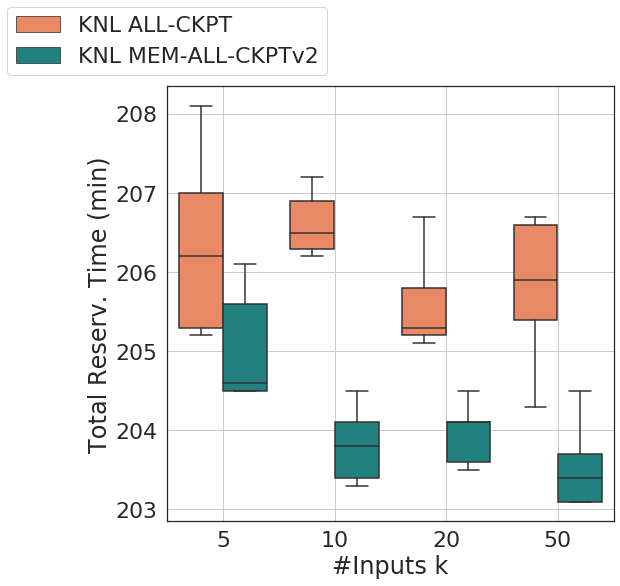

In [267]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=2)
sns.set_style("white")

my_pallette = {"Haswell ALL-CKPT": 'peachpuff', "Haswell MEM-ALL-CKPTv2": '#97cecc',
               "KNL ALL-CKPT": 'coral', "KNL MEM-ALL-CKPTv2": '#12908e'} 

bar = sns.boxplot(y="Memory", x="Training", hue="Server/Algo",
                  data=df[df['Server/Algo'].str.contains("KNL")],
                  showfliers=False, palette=my_pallette)
    
#ax.set_ylim(32, 52)
plt.legend(loc='lower center', ncol=1, bbox_to_anchor=(0, 1))
plt.grid(True)
ax.set_ylabel('Total Reserv. Time (min)')
ax.set_xlabel('#Inputs k')
plt.savefig("figures/vu_inria_time.png", bbox_inches = 'tight')
plt.show()